In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [3]:
data_train = pd.read_csv("data set\\spliting data\\train part_1.csv")





data_train_1 = pd.read_csv("data set\spliting data\\train part_1.csv")
data_train_2 = pd.read_csv("data set\\spliting data\\train part_2.csv")
data_train_3 = pd.read_csv("data set\\spliting data\\train part_3.csv")
data_train_4 = pd.read_csv("data set\\spliting data\\train part_4.csv")
data_train_5 = pd.read_csv("data set\\spliting data\\train part_5.csv")





data_train=pd.concat([data_train_1, data_train_2,data_train_3,data_train_4,data_train_5], axis=0)




data_test= pd.read_csv("data set\\spliting data\\all_test.csv")
data_val= pd.read_csv("data set\\spliting data\\all_val.csv")

data_train = data_train.sample(frac=1).reset_index(drop=True)
data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)



In [4]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
0,fake,-390.411896,36.183731,-2.209911,-7.142710,-17.541597,-12.627215,-15.031920,-2.833848,-11.255734,...,-3.524649,-1.799601,0.753786,0.810852,3.292994,3.214347,5.734351,7.042604,10.201512,10.941113
1,fake,-302.690216,34.196045,-26.320307,-12.213280,-34.153728,-37.927235,-22.644777,-13.613338,-14.691838,...,2.605132,-0.712416,-2.661366,-6.872511,-8.021842,-10.641379,-10.883833,-11.534609,-8.857002,-7.457493
2,fake,-296.091309,59.044323,-30.796995,-26.434185,-37.118458,-36.354458,-12.411263,-10.170238,-15.259472,...,2.293290,-0.026440,-1.850163,-5.250119,-6.542281,-9.151665,-9.114019,-9.665513,-8.016767,-6.487670
3,fake,-309.534454,28.682005,-6.090619,-7.571718,-30.828266,-38.186371,-22.926201,-9.814034,-16.042358,...,2.153027,-1.567174,-3.118867,-6.813782,-7.804488,-10.958018,-10.780358,-10.707418,-8.285753,-6.702052
4,fake,-335.740021,47.459461,-15.836873,-5.612185,-34.028992,-36.455807,-24.034628,-9.690795,-18.377897,...,1.396497,-0.535067,-3.382467,-6.425609,-8.710770,-10.052586,-11.245896,-10.701529,-9.579818,-7.068402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-314.364075,21.087017,-11.889081,5.396180,-36.844574,-30.481651,-19.561697,-13.079069,-14.754117,...,1.508715,-0.755999,-2.745036,-5.441601,-6.573214,-8.752208,-8.891453,-9.485078,-7.404404,-6.127477
117889,fake,-316.149445,33.560886,-11.718859,-2.805031,-35.146912,-35.689915,-21.155016,-18.258888,-15.056440,...,1.578641,-1.422224,-3.755065,-7.096481,-9.110693,-11.269311,-11.134414,-11.925699,-9.191976,-7.334814
117890,fake,-312.097351,32.648270,-17.356129,-7.982687,-32.386642,-37.575462,-19.904900,-16.402197,-15.143481,...,2.307414,-1.131895,-2.889786,-6.686602,-8.080557,-10.778538,-10.595271,-10.889177,-8.688051,-7.662374
117891,fake,-378.257935,46.273685,-15.008307,-11.794468,-13.715914,-8.099716,-25.605478,-5.099084,-10.083991,...,-3.759995,-2.446818,0.391071,1.380785,3.289218,3.620853,6.243157,7.389686,9.830298,11.276867


# Encoding

In [5]:
def encodeing(row):
    if row == "real":
      row = 0
    else :
      row =1
    return row

      

In [6]:
# data_train['label'] = data_train['label'].apply(encodeing)
# data_test['label']=data_test['label'].apply(encodeing)
# data_val['label']=data_test['label'].apply(encodeing)

In [7]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
0,fake,-390.411896,36.183731,-2.209911,-7.142710,-17.541597,-12.627215,-15.031920,-2.833848,-11.255734,...,-3.524649,-1.799601,0.753786,0.810852,3.292994,3.214347,5.734351,7.042604,10.201512,10.941113
1,fake,-302.690216,34.196045,-26.320307,-12.213280,-34.153728,-37.927235,-22.644777,-13.613338,-14.691838,...,2.605132,-0.712416,-2.661366,-6.872511,-8.021842,-10.641379,-10.883833,-11.534609,-8.857002,-7.457493
2,fake,-296.091309,59.044323,-30.796995,-26.434185,-37.118458,-36.354458,-12.411263,-10.170238,-15.259472,...,2.293290,-0.026440,-1.850163,-5.250119,-6.542281,-9.151665,-9.114019,-9.665513,-8.016767,-6.487670
3,fake,-309.534454,28.682005,-6.090619,-7.571718,-30.828266,-38.186371,-22.926201,-9.814034,-16.042358,...,2.153027,-1.567174,-3.118867,-6.813782,-7.804488,-10.958018,-10.780358,-10.707418,-8.285753,-6.702052
4,fake,-335.740021,47.459461,-15.836873,-5.612185,-34.028992,-36.455807,-24.034628,-9.690795,-18.377897,...,1.396497,-0.535067,-3.382467,-6.425609,-8.710770,-10.052586,-11.245896,-10.701529,-9.579818,-7.068402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-314.364075,21.087017,-11.889081,5.396180,-36.844574,-30.481651,-19.561697,-13.079069,-14.754117,...,1.508715,-0.755999,-2.745036,-5.441601,-6.573214,-8.752208,-8.891453,-9.485078,-7.404404,-6.127477
117889,fake,-316.149445,33.560886,-11.718859,-2.805031,-35.146912,-35.689915,-21.155016,-18.258888,-15.056440,...,1.578641,-1.422224,-3.755065,-7.096481,-9.110693,-11.269311,-11.134414,-11.925699,-9.191976,-7.334814
117890,fake,-312.097351,32.648270,-17.356129,-7.982687,-32.386642,-37.575462,-19.904900,-16.402197,-15.143481,...,2.307414,-1.131895,-2.889786,-6.686602,-8.080557,-10.778538,-10.595271,-10.889177,-8.688051,-7.662374
117891,fake,-378.257935,46.273685,-15.008307,-11.794468,-13.715914,-8.099716,-25.605478,-5.099084,-10.083991,...,-3.759995,-2.446818,0.391071,1.380785,3.289218,3.620853,6.243157,7.389686,9.830298,11.276867


In [8]:
count = data_train['label'].value_counts()
print(count)


fake    107413
real     10480
Name: label, dtype: int64


In [9]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels

X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels


In [10]:
import pandas as pd
y_train = pd.get_dummies(y_train)
y_val=pd.get_dummies(y_val)
y_test=pd.get_dummies(y_test)

In [11]:
y_train

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
117888,1,0
117889,1,0
117890,1,0
117891,1,0


In [12]:
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

from keras.layers import Conv1D, MaxPooling1D, Flatten

import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus[0], 'GPU')
# logical_gpus = tf.config.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 73, 128)           512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 36, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 64)                294976    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 295,618
Trainable params: 295,618
Non-trainable params: 0
__________________________________________________

In [13]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.0862 - accuracy: 0.9718 - 1000ms/epoch - 2ms/step
Test Accuracy: 97.18%


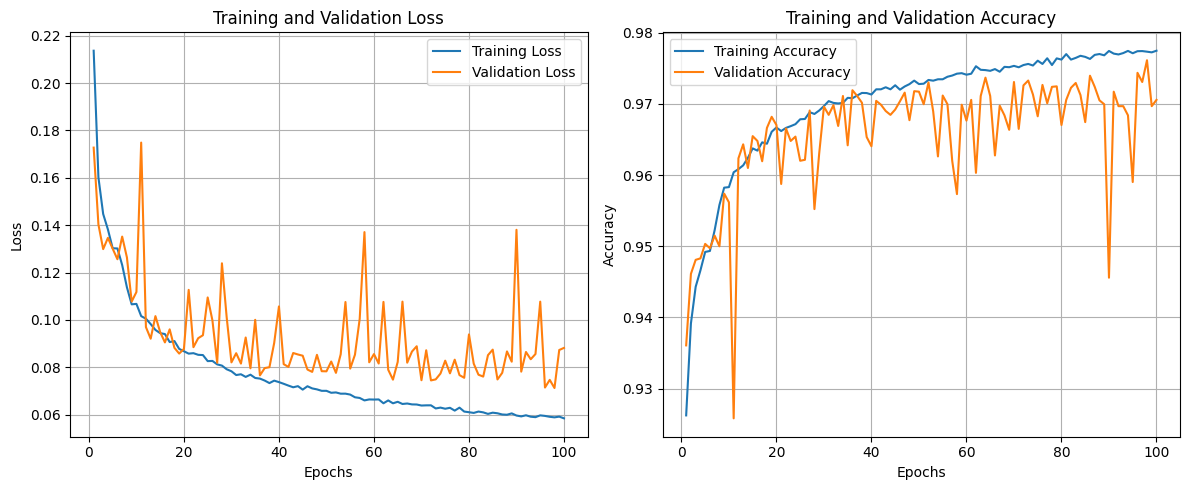

In [14]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [15]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


461/461 [==============================] - 1s 1000us/step


In [16]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,1,0
14734,1,0


In [17]:
y_ture=np.argmax(y_test.values, axis=1)


In [18]:
y_ture

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Test f1_score : 81.90%


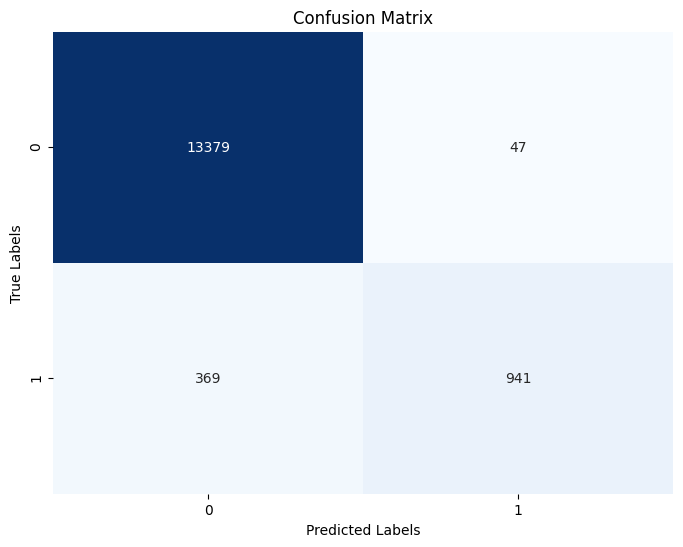

In [19]:


from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,1,0
14734,1,0


# eraly stopping

In [22]:

from keras.layers import Conv1D, MaxPooling1D, Flatten

import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus[0], 'GPU')
# logical_gpus = tf.config.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

model = Sequential()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
# Add a 1D convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),callbacks=[callback])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 73, 128)           512       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 36, 128)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                294976    
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 295,618
Trainable params: 295,618
Non-trainable params: 0
________________________________________________

Epoch 1/100
1843/1843 [==============================] - 10s 5ms/step - loss: 0.2098 - accuracy: 0.9268 - val_loss: 0.1592 - val_accuracy: 0.9376
Epoch 2/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1649 - accuracy: 0.9392 - val_loss: 0.1466 - val_accuracy: 0.9423
Epoch 3/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1466 - accuracy: 0.9449 - val_loss: 0.1753 - val_accuracy: 0.9341
Epoch 4/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1346 - accuracy: 0.9497 - val_loss: 0.1198 - val_accuracy: 0.9549
Epoch 5/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1222 - accuracy: 0.9540 - val_loss: 0.1226 - val_accuracy: 0.9514
Epoch 6/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1127 - accuracy: 0.9577 - val_loss: 0.1241 - val_accuracy: 0.9530
Epoch 7/100
1843/1843 [==============================] - 10s 5ms/step - loss: 0.1055 - accuracy: 0.9603 - val_loss: 0.1022 - val_

In [23]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.0558 - accuracy: 0.9808 - 900ms/epoch - 2ms/step
Test Accuracy: 98.08%


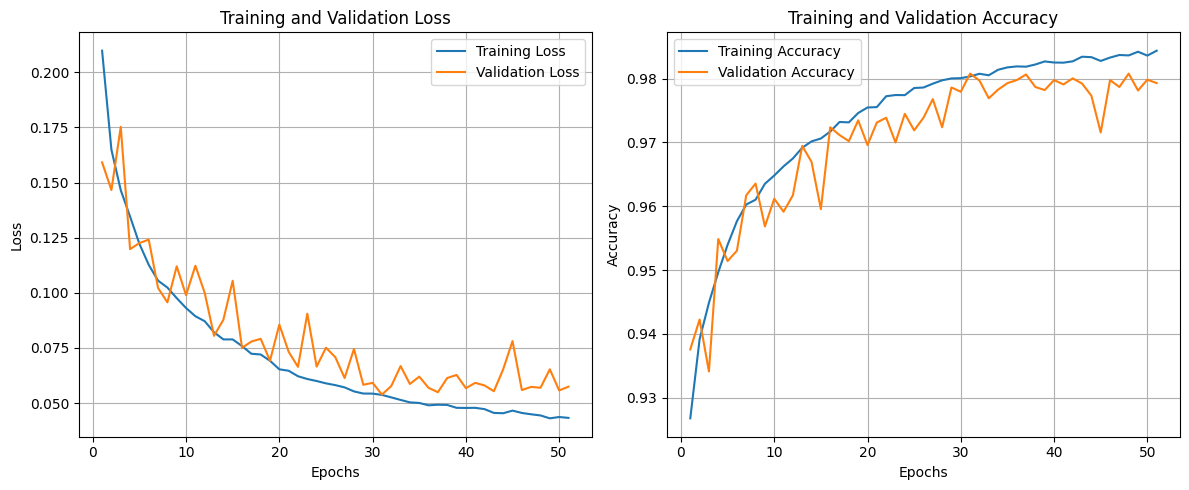

In [24]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 1ms/step
Test f1_score : 88.78%


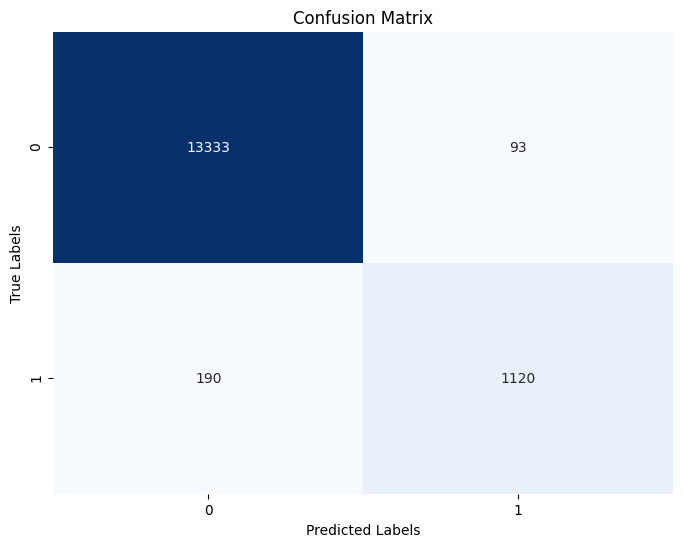

In [25]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()